In [1]:
# Logistice Regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Importing the dataset
dataset = pd.read_csv('C:\\Datasets-master\\Social_Network_ads.csv')

In [7]:
dataset.head()

,User_ID,Gender,Age,EstimateSalary,Purchased
0,15624510,Male,19,19000,0
1,15624511,Male,35,20000,0
2,15624512,Female,26,43000,0
3,15624513,Female,27,57000,1
4,15624514,Male,19,34000,0


(Xi - min(Age))/ (Max(age) - Min(age))

In [8]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [9]:
print(X[0:5])

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 34000]]


In [10]:
print(y[0:5])

[0 0 0 1 0]


In [12]:
# Splitting the dataset into the Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train[0:5,]

array([[-0.86499748,  1.83960651],
       [-0.059655  , -0.65178945],
       [ 1.99844245, -0.65178945],
       [ 0.11931   , -1.19536674],
       [-1.22292747,  0.97894245]])

In [15]:
# Fitting Logistic Regression to the Trainng set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [20]:
y_pred

array([0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [18]:
cm

array([[6, 0],
       [0, 1]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


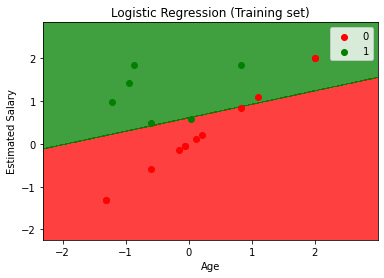

In [19]:
# visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() +1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() +1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, i],
               c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# Visualising teh Test set